The purpose of the Data Science project is to reduce the human work to dectect fake notes.In here we implement a machine learning model that will automatically detect fake notes

###################################################### Dataset description  ########################################################
In this datsaset contains digitised hundreds of images of genuine and forged banknotes.Here the used a mathematical tool Wavelets
can be used to extract information from many different kinds of data,including from images.

V1 denotes variance, V2 denotes skewness, V3 denotes curtosis.V4 denotes entropy.


In [21]:
import pandas as pd
import numpy as np

data = pd.read_csv('data_banknote_authentication.txt',sep=',',header=None,index_col=False)  
data.columns = ['V1', 'V2',"V3","V4",'Label']

# Normalization  
data['V1'] = data['V1'].apply(lambda x: (x-data['V1'].min())/(data['V1'].max()-data['V1'].min()))
data['V2'] = data['V2'].apply(lambda x: (x-data['V2'].min())/(data['V2'].max()-data['V2'].min()))
data['V3'] = data['V3'].apply(lambda x: (x-data['V3'].min())/(data['V3'].max()-data['V3'].min()))
data['V4'] = data['V4'].apply(lambda x: (x-data['V4'].min())/(data['V4'].max()-data['V4'].min()))

data_t = data.get(['V1', 'V2',"V3","V4"])
stand_dev = data_t.std(axis=0) 
mean = data_t.mean(axis=0)
variance = data_t.var(axis=0)
minimum =  data_t.min(axis=0)
maximum = data_t.max(axis=0)


#################### Analysis the data ########################

Here we can see how many samples are we used for both labels

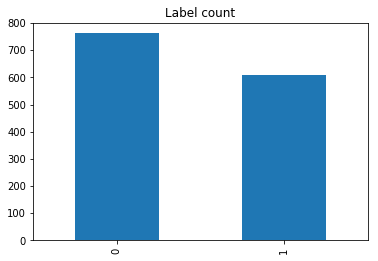

In [22]:
data['Label'].value_counts().plot(kind='bar', title='Label count')

 Text(0,0,'V1'),
 Text(0,0,'V2'),
 Text(0,0,'V3'),
 Text(0,0,'V4'),
 Text(0,0,'V1'),
 Text(0,0,'V2'),
 Text(0,0,'V3'),
 Text(0,0,'V4')]

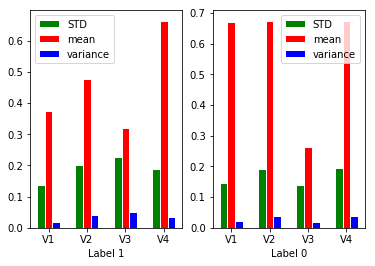

In [23]:
from matplotlib import pyplot as plt
from matplotlib import patches as patche

ax,fig = plt.subplots(1, 2)

fig[0].bar([0,1,2,3],data_t[data['Label']==1].std(axis=0),width=0.2,color='green',edgecolor='white',label='STD')
fig[0].bar([0.2,1.2,2.2,3.2],data_t[data['Label']==1].mean(axis=0),color='red',width=0.2,edgecolor='white',label='mean')
fig[0].bar([0.4,1.4,2.4,3.4],data_t[data['Label']==1].var(axis=0),color='blue',width=0.2,edgecolor='white',label='variance')
fig[0].legend()
fig[0].set_xlabel("Label 1")

fig[1].bar([0,1,2,3],data_t[data['Label']==0].std(axis=0),width=0.2,color='green',edgecolor='white',label='STD')
fig[1].bar([0.2,1.2,2.2,3.2],data_t[data['Label']==0].mean(axis=0),color='red',width=0.2,edgecolor='white',label='mean')
fig[1].bar([0.4,1.4,2.4,3.4],data_t[data['Label']==0].var(axis=0),color='blue',width=0.2,edgecolor='white',label='variance')
fig[1].legend()
fig[1].set_xlabel("Label 0")

plt.setp(fig, xticks=[0.2, 1.2, 2.2,3.2], xticklabels=['V1','V2','V3','V4'])


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
V1       1372 non-null float64
V2       1372 non-null float64
V3       1372 non-null float64
V4       1372 non-null float64
Label    1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [25]:
data.describe()

,V1,V2,V3,V4,Label
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.539114,0.587301,0.287924,0.668917,0.444606
std,0.205003,0.219611,0.185669,0.191041,0.497103
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379977,0.451451,0.159869,0.557821,0.000000
50%,0.543617,0.602168,0.254280,0.723929,0.000000
75%,0.711304,0.770363,0.364674,0.813171,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


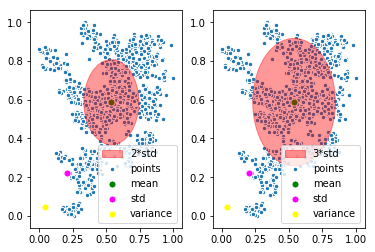

In [6]:
from matplotlib import patches as patche

ax,fig = plt.subplots(1, 2)
ellipse = patche.Ellipse([mean[0],mean[1]],stand_dev[0]*2,stand_dev[1]*2,alpha=0.4,color='red',label='2*std')

fig[0].scatter(data.V1,data.V2,s=20,label='points',edgecolor='white')
fig[0].scatter(mean[0],mean[1],color='green',s=50,label='mean',edgecolor='white')
fig[0].scatter(stand_dev[0],stand_dev[1],color='magenta',s=50,label='std',edgecolor='white')
fig[0].scatter(variance[0],variance[1],color='yellow',s=50,label='variance',edgecolor='white')
fig[0].add_patch(ellipse)
fig[0].legend()

ellipse = patche.Ellipse([mean[0],mean[1]],stand_dev[0]*3,stand_dev[1]*3,alpha=0.4,color='red',label='3*std')
fig[1].scatter(data.V1,data.V2,s=20,label='points',edgecolor='white')
fig[1].scatter(mean[0],mean[1],color='green',s=50,label='mean',edgecolor='white')
fig[1].scatter(stand_dev[0],stand_dev[1],color='magenta',s=50,label='std',edgecolor='white')
fig[1].scatter(variance[0],variance[1],color='yellow',s=50,label='variance',edgecolor='white')
fig[1].add_patch(ellipse)
fig[1].legend()


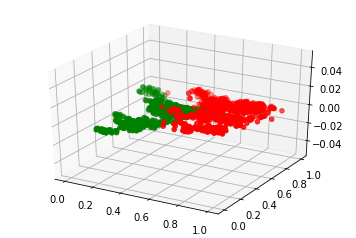

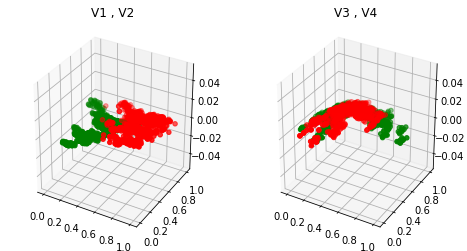

In [26]:
from mpl_toolkits.mplot3d import Axes3D

lab1 = data[data['Label'] == 1 ]
lab0 = data[data['Label'] == 0 ]

fig = plt.figure()
ax = plt.axes(projection ="3d")
ax.scatter3D(lab1.V1,lab1.V2, np.zeros(len(lab1)), color = "green")
ax.scatter3D(lab0.V1,lab0.V2, np.zeros(len(lab0)), color = "red")
plt.title("")
plt.show()

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(lab1.V1,lab1.V2, np.zeros(len(lab1)), color = "green")
ax.scatter3D(lab0.V1,lab0.V2, np.zeros(len(lab0)), color = "red")
ax.title.set_text('V1 , V2')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(lab1.V3,lab1.V4, np.zeros(len(lab1)), color = "green")
ax.scatter3D(lab0.V3,lab0.V4, np.zeros(len(lab0)), color = "red")
ax.title.set_text('V3 , V4')
plt.show()

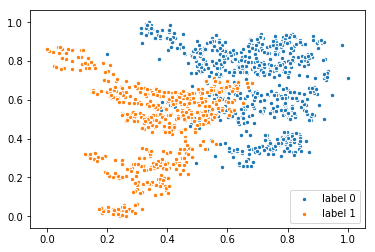

In [28]:
plt.figure()
plt.scatter(lab0.V1,lab0.V2,s=20,label='label 0',edgecolor='white')
plt.scatter(lab1.V1,lab1.V2,s=20,label='label 1',edgecolor='white')
plt.legend()

In [ ]:
############################### Clustering ###################################

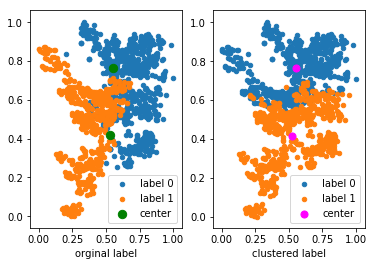

In [30]:
from sklearn.cluster import KMeans
x = np.array(data.iloc[:,:-1])

############ cluster with all features ###############
# Kmeans with two clusters
kmeans_l = KMeans(n_clusters=2, max_iter=500 ).fit(x)  
label_l = kmeans_l.labels_
center_l = kmeans_l.cluster_centers_

# Kmeans with three clusters
kmeans_e = KMeans(n_clusters=3, max_iter=500 ).fit(x)  
label_e = kmeans_e.labels_
center_e = kmeans_e.cluster_centers_

ax,fig = plt.subplots(1, 2)
fig[0].set_xlabel("orginal label")
fig[0].scatter(lab0.V1,lab0.V2,s=20,label='label 0')
fig[0].scatter(lab1.V1,lab1.V2,s=20,label='label 1')
fig[0].scatter(center_l[:,0],center_l[:,1],color='green',s=70,label='center')
fig[0].legend()

ind0 = np.where(label_l==0)[0]
clu0 = data.iloc[ind0,:2]

ind1 = np.where(label_l==1)[0]
clu1 = data.iloc[ind1,:2]

fig[1].set_xlabel("clustered label")
fig[1].scatter(clu0.iloc[:,0],clu0.iloc[:,1],s=20,label='label 0')
fig[1].scatter(clu1.iloc[:,0],clu1.iloc[:,1],s=20,label='label 1')
fig[1].scatter(center_l[:,0],center_l[:,1],color='magenta',s=50,label='center')
fig[1].legend()

In [31]:
from sklearn.metrics import classification_report,accuracy_score
print('Accuracy : ',accuracy_score(data.Label,label_l))
print(classification_report(data.Label,label_l))

Accuracy :  0.575801749271137
             precision    recall  f1-score   support

          0       0.63      0.56      0.59       762
          1       0.52      0.60      0.56       610

avg / total       0.58      0.58      0.58      1372



If we see here we try to cluter the data with all the features.we got accuracy of 57.58% in clustering it is okay but it is not enough so we want to check with other features also.

############################# cluster with V1 V2 features #################################

Accuracy :  0.8724489795918368
             precision    recall  f1-score   support

          0       0.88      0.89      0.89       762
          1       0.86      0.85      0.86       610

avg / total       0.87      0.87      0.87      1372



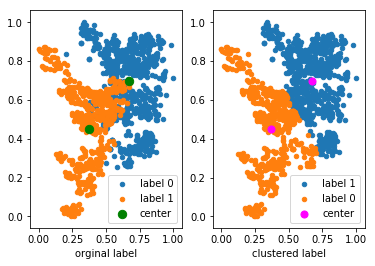

In [33]:
x = np.array(data.iloc[:,:2])

# Kmeans with two clusters
kmeans_l = KMeans(n_clusters=2, max_iter=500 ).fit(x)  
label_l = kmeans_l.labels_
center_l = kmeans_l.cluster_centers_

lab1= data[data['Label'] == 1 ]
lab0= data[data['Label'] == 0 ]

ax,fig = plt.subplots(1, 2)
fig[0].set_xlabel("orginal label")
fig[0].scatter(lab0.V1,lab0.V2,s=20,label='label 0')
fig[0].scatter(lab1.V1,lab1.V2,s=20,label='label 1')
fig[0].scatter(center_l[:,0],center_l[:,1],color='green',s=70,label='center')
fig[0].legend()

ind0 = np.where(label_l==0)[0]
clu0 = data.iloc[ind0,:2]
ind1 = np.where(label_l==1)[0]
clu1 = data.iloc[ind1,:2]

fig[1].set_xlabel("clustered label")
fig[1].scatter(clu0.iloc[:,0],clu0.iloc[:,1],s=20,label='label 1')
fig[1].scatter(clu1.iloc[:,0],clu1.iloc[:,1],s=20,label='label 0')
fig[1].scatter(center_l[:,0],center_l[:,1],color='magenta',s=50,label='center')
fig[1].legend()

from sklearn.metrics import classification_report,accuracy_score
print('Accuracy : ',accuracy_score(data.Label,label_l))
print(classification_report(data.Label,label_l))

while trying to cluster with v1 and v2 features.We got accuracy of 87.24% in clustering it is good but it is not enough so we 
want to check with other features also.

################################## clustering with V3 and v4 feature ##################################

Accuracy :  1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       762
          1       1.00      1.00      1.00       610

avg / total       1.00      1.00      1.00      1372



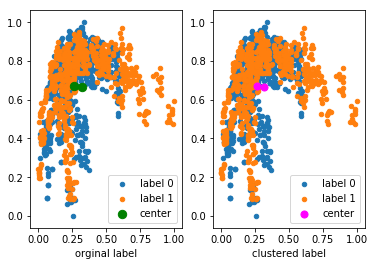

In [34]:
from sklearn.cluster import KMeans
x = np.array(data.iloc[:,2:5])

# Kmeans with two clusters
kmeans_l = KMeans(n_clusters=2, max_iter=500 ).fit(x)  
label_l = kmeans_l.labels_
center_l = kmeans_l.cluster_centers_

lab1= data[data['Label'] == 1 ]
lab0= data[data['Label'] == 0 ]

ax,fig = plt.subplots(1, 2)
fig[0].set_xlabel("orginal label")
fig[0].scatter(lab0.V3,lab0.V4,s=20,label='label 0')
fig[0].scatter(lab1.V3,lab1.V4,s=20,label='label 1')
fig[0].scatter(center_l[:,0],center_l[:,1],color='green',s=70,label='center')
fig[0].legend()

ind0 = np.where(label_l==0)[0]
clu0 = data.iloc[ind0,2:5]
ind1 = np.where(label_l==1)[0]
clu1 = data.iloc[ind1,2:5]

fig[1].set_xlabel("clustered label")
fig[1].scatter(clu0.iloc[:,0],clu0.iloc[:,1],s=20,label='label 0')
fig[1].scatter(clu1.iloc[:,0],clu1.iloc[:,1],s=20,label='label 1')
fig[1].scatter(center_l[:,0],center_l[:,1],color='magenta',s=50,label='center')
fig[1].legend()

from sklearn.metrics import classification_report,accuracy_score
print('Accuracy : ',accuracy_score(data.Label,label_l))
print(classification_report(data.Label,label_l))

while trying to cluster with v3 and v4 features.We got accuracy of 100% in clustering it is far better than any other features 
while trying to dectect the fake note.so we can use the v3 and v4 feature to find out the fake notes into the orginal ones. 

After all the tests with our features i will recommend we can use this kmeans algorithm to detect the fake bank notes over the data.It will get 99% of accuracy of detecting fake bank notes through the dataset.